# Ford GoBike System Data Exploration
### By Mohamed Samir Ahmed Assem

# Preliminary Wrangling

This document explores a dataset containing data about trips from the ford go bike system.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import calendar
from datetime import time

In [2]:
# load in the dataset into a pandas dataframe, print first few lines statistics
df=pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#Descriptive statistics of numeric values columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> DataSet contains data about 183,412 trip via the FORD-Go Bike Sharing system, each row represents a trip and the following data is available for each trip:

> <ul>
  <li>Trip Duration in Seconds</li>
  <li>Start and End date and time of Trip</li>
  <li>Start and End station location and  name </li>
  <li>Bike identifier</li>
  <li>User Type (either member or customer)</li>
  <li>User birthdate and gender</li>
  <li>and if the bike was shared for the whole trip</li>
  </ul> 

### What is/are the main feature(s) of interest in your dataset?

> Features of interest:
> <ul>
  <li>Trip Duration in Seconds</li>
  <li>Start and End date and time of Trip</li>
  <li>User Type (either member or customer)</li>
  <li>User birthdate and gender</li>
  </ul> 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Just the mentioned features of interest

In [5]:
#Removing rows with missing values
df.dropna(inplace=True)

In [6]:
#Converting some data types into usable data types 
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])
#Creating a new age column and removing ages > 100 years
df['age']=df['start_time'].dt.year-df['member_birth_year']
df.drop(df[df['age'] > 100].index, inplace = True)

## Exploratory Analysis

### Univariate Exploration
#### What is the distribution of Trips' durations? 

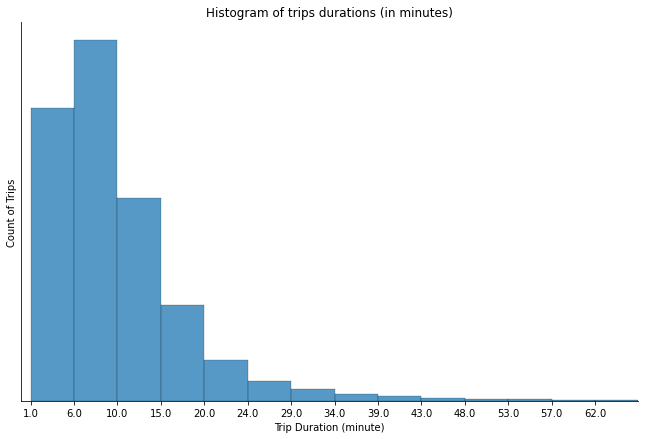

In [7]:
#duration
base_color=sb.color_palette()[0]
bins=300
fig=sb.displot(data=df,x='duration_sec',bins=bins,height=6, aspect=1.6);
tick_step=(df['duration_sec'].max()-df['duration_sec'].min())/(bins)
x_ticks=np.arange(df['duration_sec'].min(),df['duration_sec'].max(),tick_step)
fig.set(xticks=x_ticks,xticklabels=np.around(x_ticks/60));
fig.set(yticks=[]);
fig.set(xlabel="Trip Duration (minute)");
fig.set(ylabel="Count of Trips");
fig.set(title="Histogram of trips durations (in minutes)")
fig.set(xlim=(0,4000));

>the plot had a very long tail of trips with durations more than 4000 seconds which had to be omitted due to very low frequency.

In [8]:
#Finding ratio of trips durations that falls within plot limit
df[df['duration_sec']<=4000]['duration_sec'].count()/df['duration_sec'].shape[0]

0.9931495882891125

>Duration of trips follows a right skewed normal distribution, having an average of 11.7 minutes and minimum of 1 minute and maximum of 23.5 hrs, however 99.3% of trips are shorter than 62 minutes.

#### What is the distribution of ages of users?

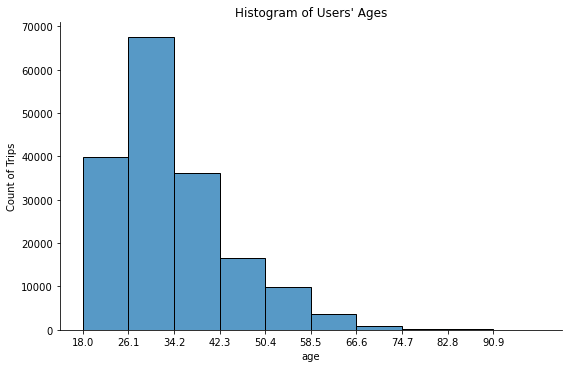

In [9]:
#age
bins=10
fig=sb.displot(data=df,x='age',bins=bins,height=5, aspect=1.6);
tick_step=(df['age'].max()-df['age'].min())/bins
fig.set(xticks=np.arange(df['age'].min(),df['age'].max(),tick_step));
fig.set(title="Histogram of Users' Ages");
fig.set(ylabel="Count of Trips");

>most users' ages are between 18 and 42 years old.

#### What is the ratio of users from each gender?

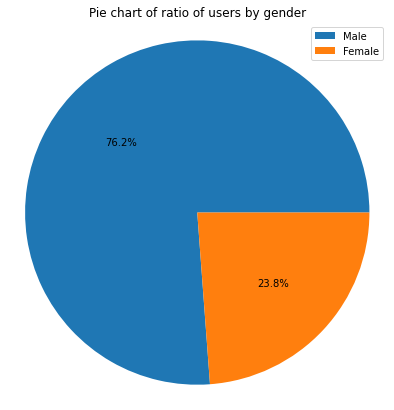

In [10]:
# Then, analysing genders of users. 
#Gender
df_filtered=df[df['member_gender']!= 'Other']
gender_counts=df_filtered['member_gender'].value_counts()/df_filtered['member_gender'].shape[0]
plt.figure(figsize=(7,7))
plt.pie(gender_counts,autopct = '%1.1f%%');
plt.axis('square');
plt.legend(labels=gender_counts.index)
plt.title('Pie chart of ratio of users by gender');

>Male users represent 76% of total users

#### Does time of day had effect on number of bike trips?

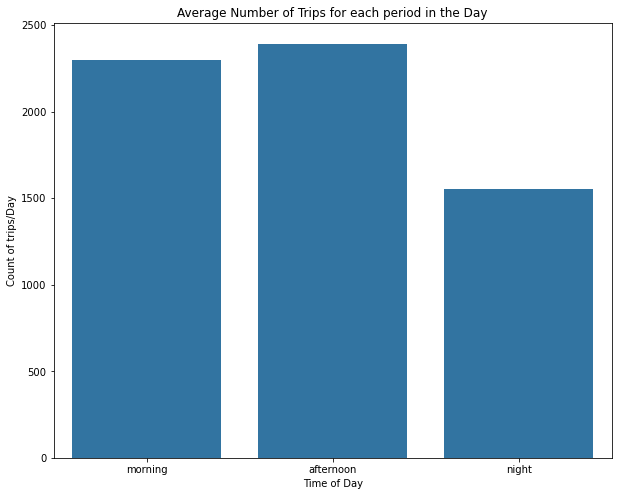

In [11]:
# time of day (6.00 AM to 12:00 PM  : Morning
#              12:00 PM to 18:00 PM : Afternoon
#              18:00 PM to 06:00 AM : Night)
conditions = [
    (df['start_time'].dt.time > time(12,0,0)) & (df['start_time'].dt.time <= time(18,0,0)),
    (df['start_time'].dt.time > time(18,0,0)) & (df['start_time'].dt.time <= time(23,59,59)),
    (df['start_time'].dt.time > time(0,0,0)) & (df['start_time'].dt.time < time(6,0,0)),
    (df['start_time'].dt.time >= time(6,0,0)) & (df['start_time'].dt.time <= time(12,0,0))]

# create a list of the values we want to assign for each condition
values = ['afternoon', 'night', 'night', 'morning']

# create a new column and use np.select to assign values to it using our lists as arguments
df['time_day'] = np.select(conditions, values)
# Create a new column contains only the date from start_time column
df['start_day']=df['start_time'].dt.date
fig_data=df['time_day'].value_counts()/df['start_day'].nunique()
fig_order=['morning','afternoon','night']
plt.figure(figsize=(10,8))
g=sb.barplot(x=fig_data.index.values, y=fig_data,order=fig_order,color=base_color);
g.set(xlabel='Time of Day');
g.set(ylabel='Count of trips/Day');
g.set(title='Average Number of Trips for each period in the Day');

>Trip requests fall at night but customers' highest number of trips usually take place in the after noon. 
<br>
<br>
Please note that:
<br>
Morning &nbsp;&nbsp;&nbsp; :&nbsp; 6.00  AM to 12:00 PM 
<br>
Afternoon &nbsp;:&nbsp; 12:00 PM to 18:00 PM 
<br>
Night &nbsp; &nbsp; &nbsp; &nbsp;  :&nbsp; 18:00 PM to 06:00 AM 

#### Does number of rides change according to day of week?

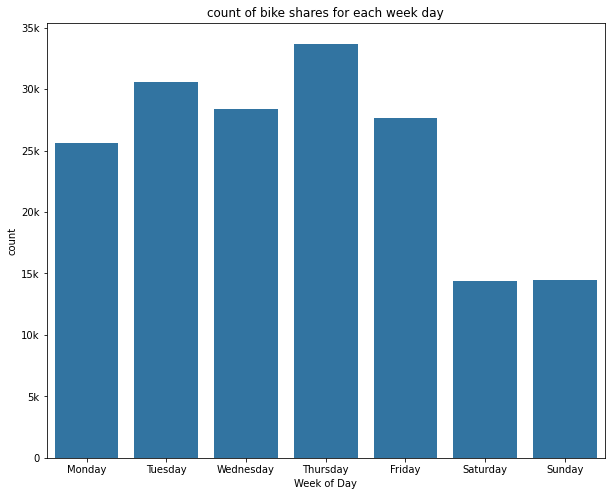

In [12]:
#Day of week
df['week_day']=df['start_time'].dt.day_name()
fig_order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday']
plt.figure(figsize=(10,8))
fig=sb.countplot(data = df,x='week_day',order=fig_order,color=base_color);
fig.set(title ='count of bike shares for each week day');
y_labels=['0','5k','10k','15k','20k','25k','30k','35k']
y_ticks=[0,5000,10000,15000,20000,25000,30000,35000]
plt.yticks(y_ticks,y_labels);
plt.xlabel('Week of Day');

> Most trips take place on tuesday and thursday, while lower number of trips on Saturdays and Sundays

#### What are the ratios of each user type?

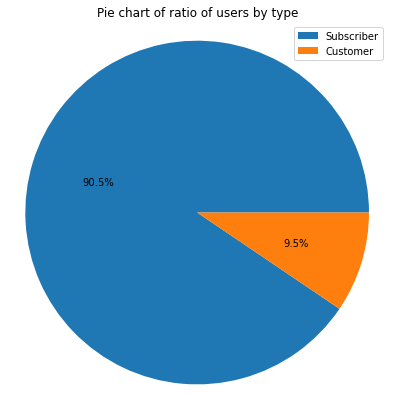

In [13]:
#user types
user_counts=df['user_type'].value_counts()/df['user_type'].shape[0]
plt.figure(figsize=(7,7))
plt.pie(user_counts,autopct = '%1.1f%%');
plt.axis('square');
plt.legend(labels=user_counts.index)
plt.title('Pie chart of ratio of users by type');

> 90.5% of users are subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip duration is a highly skewed normal distribution with a very long tail which i had to limit the plot to trip duration lower than 4000 seconds because trips with a longer duration have a very low frquency.   

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some birthdate of user are not logical as it gives user age over 100 years so i removed rows with ages > 100 years.
  <br>
      There are some genders in the dataset specified as "other" which have to be excluded while creating plot related to genders

## Bi-Variate Exploration

#### Does day of the week affects duration of trip?

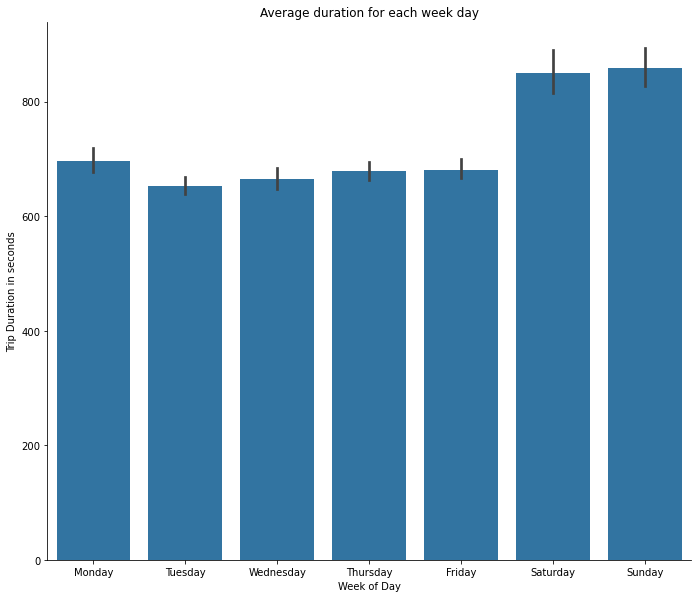

In [14]:
#Average trip duration by week day
fig=sb.catplot(data = df,x='week_day',y='duration_sec',order=fig_order,color=base_color,kind='bar',height=8,aspect=1.2);
fig.set(title ='Average duration for each week day');
fig.set(xlabel='Week of Day');
fig.set(ylabel='Trip Duration in seconds');

> Although Saturdays and sundays have the lowest number of daily trips but these day's trips have the highest average trip duration

#### Do older people make shorter trips?

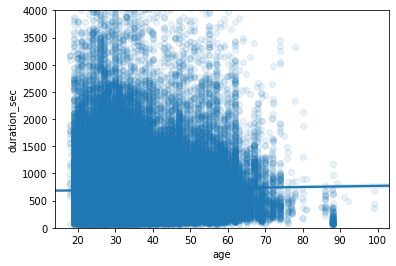

In [15]:
#age and duration
g=sb.regplot(data=df,x='age',y='duration_sec',scatter_kws={'alpha':0.1},x_jitter=.1,truncate=False);
g.set(ylim=(0,4000));

> The figure tells that older users have lower probability of making long duration trips

#### Is there a relationship between user gender and trip duration?

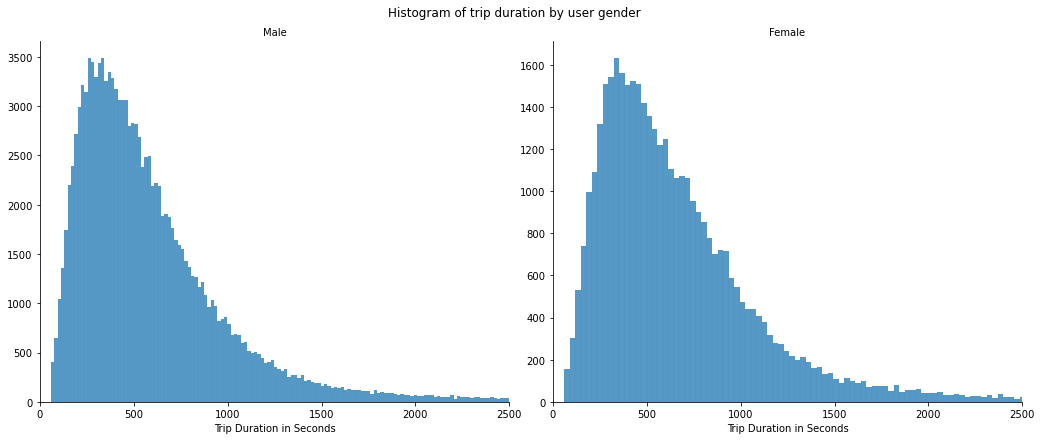

In [16]:
#gender and duration
df_filtered=df[df['member_gender']!= 'Other']
g=sb.FacetGrid(data=df_filtered,col="member_gender",margin_titles=True,sharey=False,height=6,aspect=1.2)
g.map_dataframe(sb.histplot, x='duration_sec');
g.set(xlim=(0,2500));
g.set(xlabel='Trip Duration in Seconds');
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of trip duration by user gender');

In [17]:
df_filtered.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    778.950013
Male      672.391389
Name: duration_sec, dtype: float64

>Males have a slightly lower average trip duration

#### What's the distribution of trips by day of week for each user type?

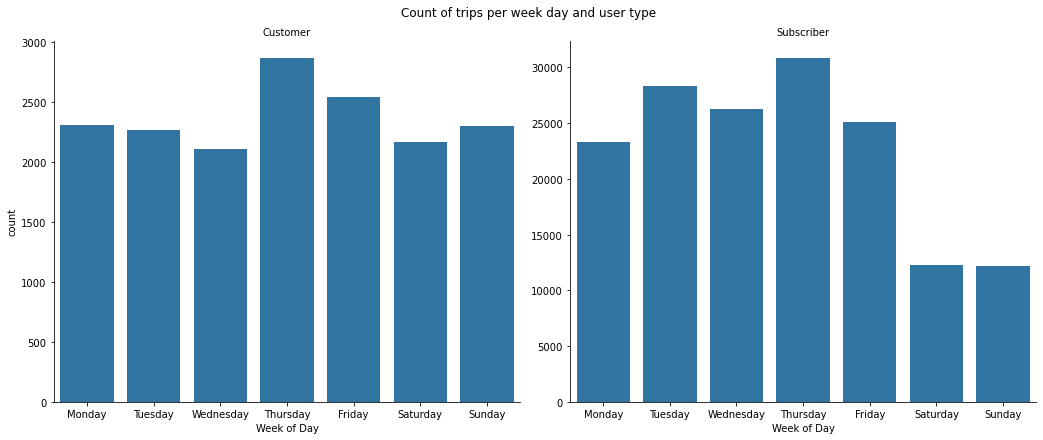

In [18]:
g=sb.catplot(x="week_day", col="user_type",data=df,color=base_color, kind="count",height=6, aspect=1.2,order=fig_order,sharey=False);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.set(xlabel="Week of Day");
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of trips per week day and user type');

> Both customer and subscriber have higher number of trips on thursdays

#### Does number of trips per each part of day differ with different user type?

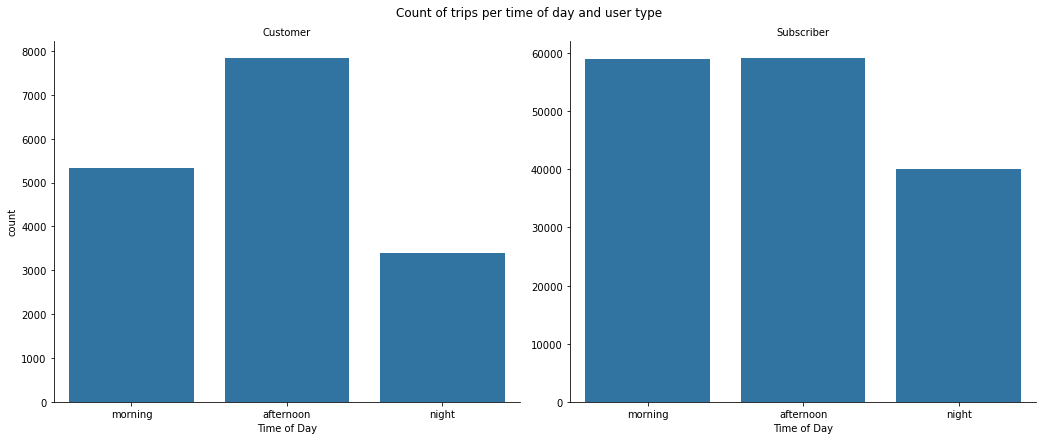

In [19]:
ax=sb.catplot(x="time_day", col="user_type",data=df,color=base_color, kind="count",height=6,margin_titles=True, aspect=1.2,order=['morning','afternoon','night'],sharey=False);
ax.set_titles(row_template = '{row_name}', col_template = '{col_name}');
ax.set(xlabel="Time of Day");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Count of trips per time of day and user type');

>Customers usually make more trips in the after noon.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> During week ends there is a lower number of trips but longer in duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> My first conclusion of that less trips happen at night was not correct as after further investigation I found that only subscribers who make less trips at night and customers make less trip in the morning also besides in the night.

## Multi-Variate Exploration

#### Does Average trip duration change either by gender or user type?

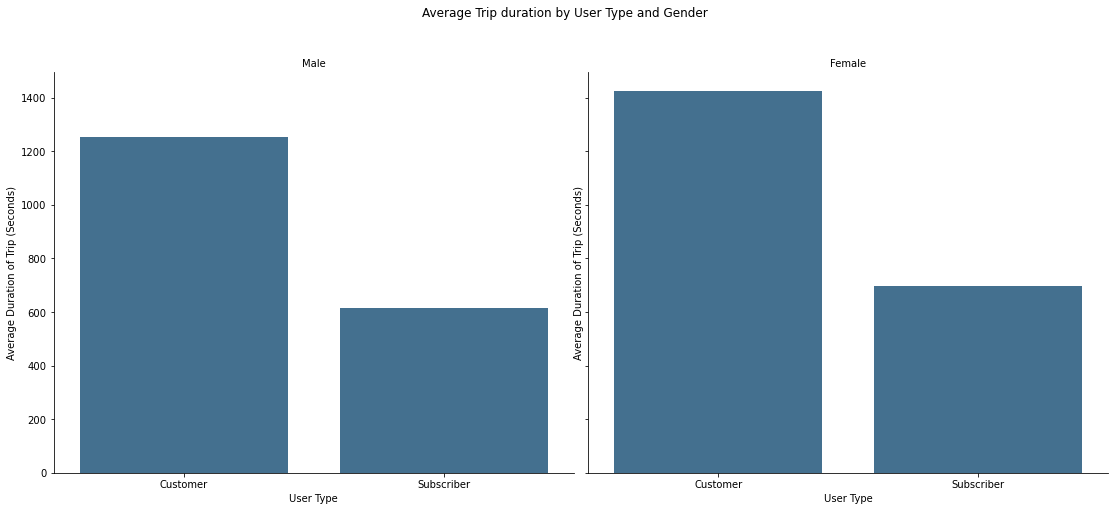

In [20]:
df_filtered=df[df['member_gender']!= 'Other']
g = sb.catplot(x="user_type", y='duration_sec',color=base_color, col="member_gender",data=df_filtered, saturation=.5,kind="bar", ci=None,height=7, aspect=1.1,margin_titles=True);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip duration by User Type and Gender');
g.set(xlabel='User Type');
g.set(ylabel='Average Duration of Trip (Seconds)');

>Customers seem to make longer trips than subscribers also females seem to make longer trips. 

#### Does the relationship between Age and duration differ by time of the day?

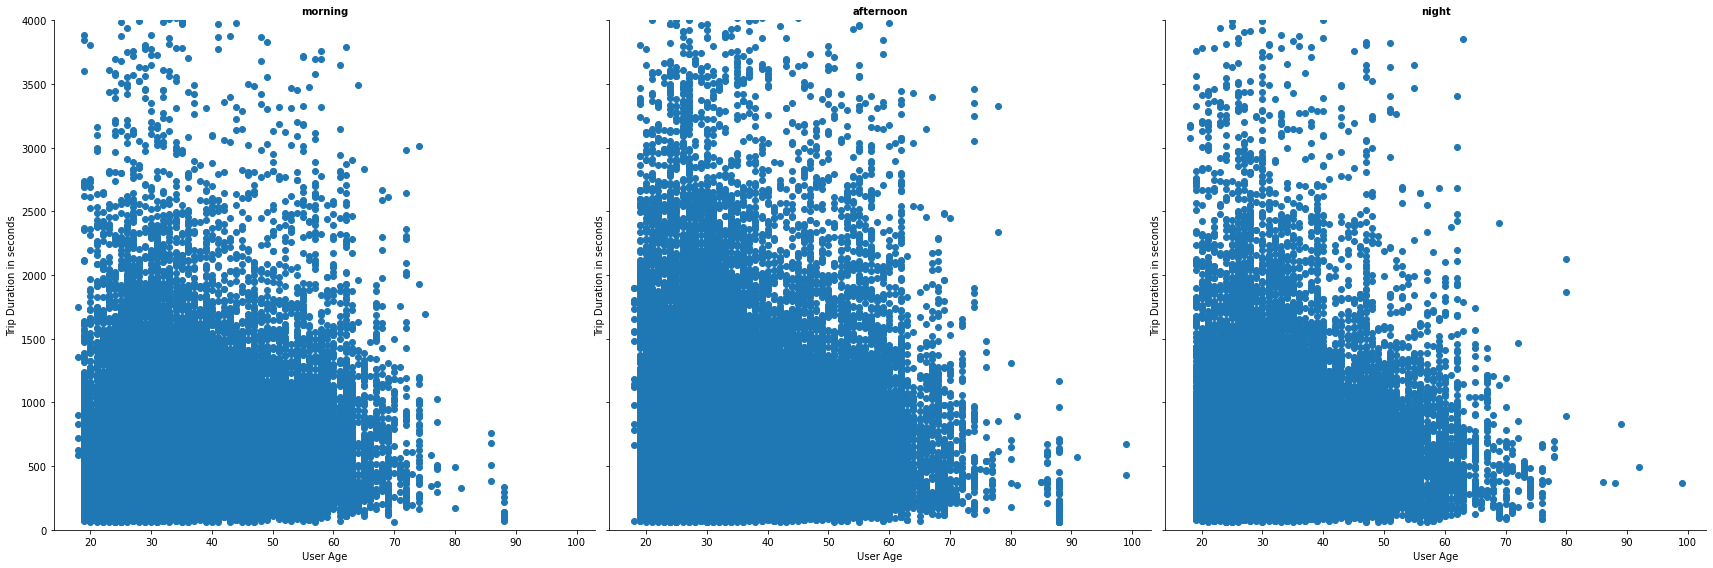

In [21]:
#age , duration & time of Day 
f=sb.FacetGrid(data=df,col='time_day',col_order=['morning','afternoon','night'],height=8)
f.map(plt.scatter,'age','duration_sec');
f.set_titles(col_template="{col_name}", fontweight='bold')
f.set(xlabel='User Age');
f.set(ylabel='Trip Duration in seconds')
f.set(ylim=(0,4000));

> the above chart is not clear i think i have to replot as a bar chart

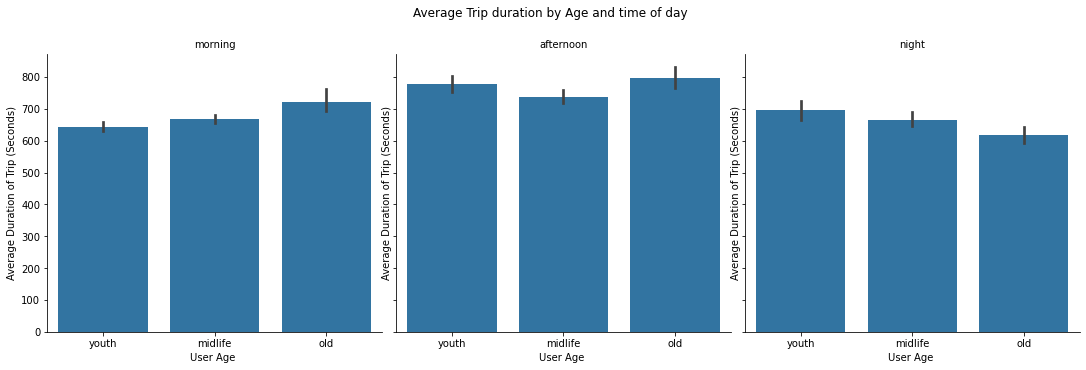

In [22]:
conditions = [
    (df['age'] > 20 ) & (df['age'] <= 30),
    (df['age'] > 30) & (df['age'] < 50),
    (df['age'] >= 50) & (df['age'] <= 100)]

# create a list of the values we want to assign for each condition
values = ['youth', 'midlife', 'old']

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_grp'] = np.select(conditions, values)
g = sb.catplot(x="age_grp", y='duration_sec',color=base_color, col="time_day",col_order=['morning','afternoon','night'],data=df,order=values,kind="bar",margin_titles=True);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip duration by Age and time of day');
g.set(xlabel='User Age ');
g.set(ylabel='Average Duration of Trip (Seconds)');

> Appearantly, Youth make longer trips in the afternoon and night while older people make longer trips in morning and afternoon

#### Are there any effects of gender and age on trip duration?

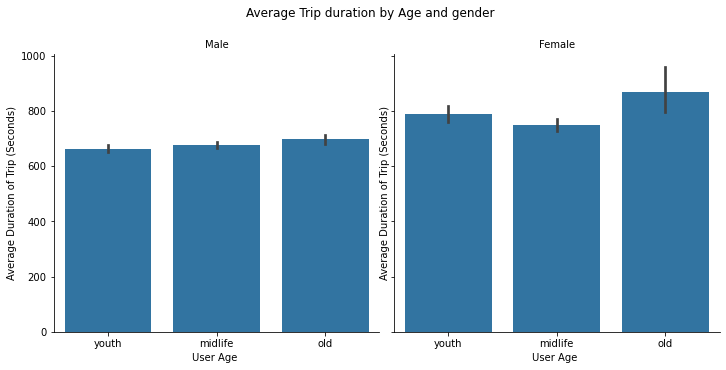

In [23]:
df_filtered=df[df['member_gender']!= 'Other']
g = sb.catplot(x="age_grp", y='duration_sec',color=base_color, col="member_gender",data=df_filtered,order=values,kind="bar",margin_titles=True);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip duration by Age and gender');
g.set(xlabel='User Age ');
g.set(ylabel='Average Duration of Trip (Seconds)');

> Seems that older females are more adventurous.

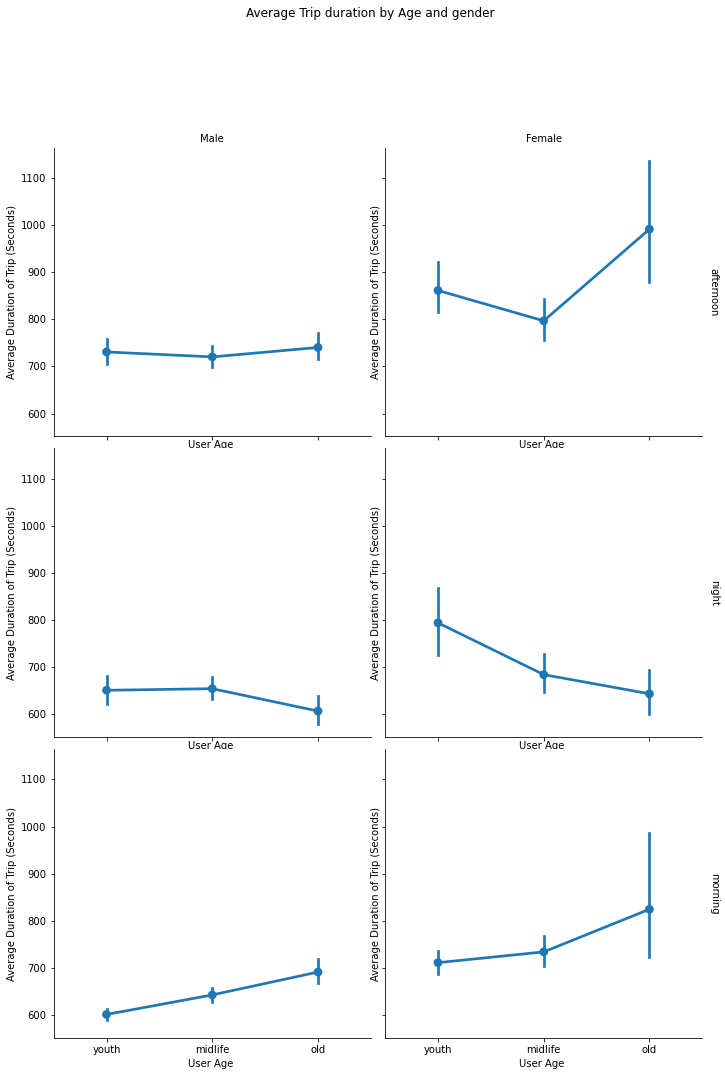

In [24]:
df_filtered=df[df['member_gender']!= 'Other']
g = sb.catplot(x="age_grp", y='duration_sec',color=base_color,row='time_day', col="member_gender",data=df_filtered,order=values,kind="point",margin_titles=True);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip duration by Age and gender');
g.set(xlabel='User Age ');
g.set(ylabel='Average Duration of Trip (Seconds)');

> longest trips by females in the afternoon

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females make longer trips.

### Were there any interesting or surprising interactions between features?

> Although that most of users are males, females seem to make longer trips which was not clear by plotting a histogram of trip duration by gender.